# Project 2 - EDA_Modeling

In this second notebook, I looked to explore and understand the data before attempting modeling. Through the use of Lasso Regression, I was able to sift through most of the data to find key features which I then put through polynomial featuring to better display the relationships between the variables and gave an overall better prediction. 


#### Contents: 
- [Preliminary Data Formatting](#Preliminary-Data-Formatting)
- [Exploratory Data Analysis](#Exploratory-Data-Analysis)
- [Correlations & Heatmap](#Correlations-&-Heatmap)
- [Modeling & Feature Selection](#Modeling-&-Feature-Selection)
- [Linear Regression Model](#Linear-Regression-Model)
- [Ridge Regression](#Ridge-Regression)
- [Lasso Regression](#Lasso-Regression)


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.model_selection import cross_val_score, train_test_split, KFold
from sklearn.linear_model import LinearRegression, Lasso, LassoCV, Ridge, RidgeCV, ElasticNet, ElasticNetCV 
from sklearn import metrics
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.dummy import DummyRegressor

In [2]:
train = pd.read_csv('datasets/train_cleaned.csv')
test = pd.read_csv('datasets/test_cleaned.csv')
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', None)
train.head()

,id,pid,mssubclass,lotfrontage,lotarea,overallqual,overallcond,yearbuilt,yearremod/add,masvnrarea,exterqual,extercond,bsmtqual,bsmtcond,bsmtexposure,bsmtfintype1,bsmtfinsf1,bsmtfintype2,bsmtfinsf2,bsmtunfsf,totalbsmtsf,heatingqc,1stflrsf,2ndflrsf,lowqualfinsf,grlivarea,bsmtfullbath,bsmthalfbath,fullbath,halfbath,bedroomabvgr,kitchenabvgr,kitchenqual,totrmsabvgrd,fireplaces,fireplacequ,garageyrblt,garagefinish,garagecars,garagearea,garagequal,garagecond,wooddecksf,openporchsf,enclosedporch,3ssnporch,screenporch,poolarea,miscval,mosold,yrsold,saleprice,mszoning_a(agr),mszoning_c(all),mszoning_fv,mszoning_i(all),mszoning_rh,mszoning_rl,mszoning_rm,street_grvl,street_pave,alley_grvl,alley_na,alley_pave,lotshape_ir1,lotshape_ir2,lotshape_ir3,lotshape_reg,landcontour_bnk,landcontour_hls,landcontour_low,landcontour_lvl,utilities_allpub,utilities_nosewa,utilities_nosewr,lotconfig_corner,lotconfig_culdsac,lotconfig_fr2,lotconfig_fr3,lotconfig_inside,landslope_gtl,landslope_mod,landslope_sev,neighborhood_blmngtn,neighborhood_blueste,neighborhood_brdale,neighborhood_brkside,neighborhood_clearcr,neighborhood_collgcr,neighborhood_crawfor,neighborhood_edwards,neighborhood_gilbert,neighborhood_greens,neighborhood_grnhill,neighborhood_idotrr,neighborhood_landmrk,neighborhood_meadowv,neighborhood_mitchel,neighborhood_names,neighborhood_npkvill,neighborhood_nwames,neighborhood_noridge,neighborhood_nridght,neighborhood_oldtown,neighborhood_swisu,neighborhood_sawyer,neighborhood_sawyerw,neighborhood_somerst,neighborhood_stonebr,neighborhood_timber,neighborhood_veenker,condition1_artery,condition1_feedr,condition1_norm,condition1_posa,condition1_posn,condition1_rrae,condition1_rran,condition1_rrne,condition1_rrnn,condition2_artery,condition2_feedr,condition2_norm,condition2_posa,condition2_posn,condition2_rrae,condition2_rran,condition2_rrnn,bldgtype_1fam,bldgtype_2fmcon,bldgtype_duplex,bldgtype_twnhs,bldgtype_twnhse,housestyle_1.5fin,housestyle_1.5unf,housestyle_1story,housestyle_2.5fin,housestyle_2.5unf,housestyle_2story,housestyle_sfoyer,housestyle_slvl,roofstyle_flat,roofstyle_gable,roofstyle_gambrel,roofstyle_hip,roofstyle_mansard,roofstyle_shed,roofmatl_clytile,roofmatl_compshg,roofmatl_membran,roofmatl_tar&grv,roofmatl_wdshake,roofmatl_wdshngl,exterior1st_asbshng,exterior1st_asphshn,exterior1st_brkcomm,exterior1st_brkface,exterior1st_cblock,exterior1st_cemntbd,exterior1st_hdboard,exterior1st_imstucc,exterior1st_metalsd,exterior1st_plywood,exterior1st_stone,exterior1st_stucco,exterior1st_vinylsd,exterior1st_wdsdng,exterior1st_wdshing,exterior2nd_asbshng,exterior2nd_asphshn,exterior2nd_brkcmn,exterior2nd_brkface,exterior2nd_cblock,exterior2nd_cmentbd,exterior2nd_hdboard,exterior2nd_imstucc,exterior2nd_metalsd,exterior2nd_plywood,exterior2nd_stone,exterior2nd_stucco,exterior2nd_vinylsd,exterior2nd_wdsdng,exterior2nd_wdshng,masvnrtype_brkcmn,masvnrtype_brkface,masvnrtype_na,masvnrtype_stone,foundation_brktil,foundation_cblock,foundation_pconc,foundation_slab,foundation_stone,foundation_wood,heating_gasa,heating_gasw,heating_grav,heating_othw,heating_wall,centralair_n,centralair_y,electrical_fusea,electrical_fusef,electrical_fusep,electrical_mix,electrical_sbrkr,functional_maj1,functional_maj2,functional_min1,functional_min2,functional_mod,functional_sal,functional_sev,functional_typ,garagetype_0,garagetype_2types,garagetype_attchd,garagetype_basment,garagetype_builtin,garagetype_carport,garagetype_detchd,paveddrive_n,paveddrive_p,paveddrive_y,poolqc_0,poolqc_ex,poolqc_fa,poolqc_gd,poolqc_ta,fence_gdprv,fence_gdwo,fence_mnprv,fence_mnww,fence_na,miscfeature_elev,miscfeature_gar2,miscfeature_na,miscfeature_othr,miscfeature_shed,miscfeature_tenc,saletype_cod,saletype_cwd,saletype_con,saletype_conld,saletype_conli,saletype_conlw,saletype_new,saletype_oth,saletype_wd
0,109,533352170,60,0.0,13517,6,8,1976,2005,289.0,4,3,3,3,1,6,533.0,1,0.0,192.0,725.0,5,725,754,0,1479,0.0,0.0,2,1,3,1,4,6,0,8,1976.0,2.0,2.0,475.0,3.0,3.0,0,44,0,0,0,0,0,3,2010,130500,0

In [3]:
train.fillna(0, inplace=True)

In [4]:
train['age'] = train['yrsold'] - train['yearbuilt']
test['age'] = test['yrsold'] - test['yearbuilt']

Creating another train variable, 'age' which will take in yearsold - yearbuilt to give the age of the house at the time it was sold

# Exploratory Data Analysis  

Starting by finding the values with the highest correlations

In [5]:
corr_matrix = train.corr()[['saleprice']].sort_values('saleprice')
corr_matrix = corr_matrix.sort_values('saleprice', ascending=False)
corr_matrix

,saleprice
saleprice,1.000000
overallqual,0.800207
exterqual,0.712146
grlivarea,0.697038
kitchenqual,0.692336
garagearea,0.650246
garagecars,0.648128
totalbsmtsf,0.629303
1stflrsf,0.618486
bsmtqual,0.612188


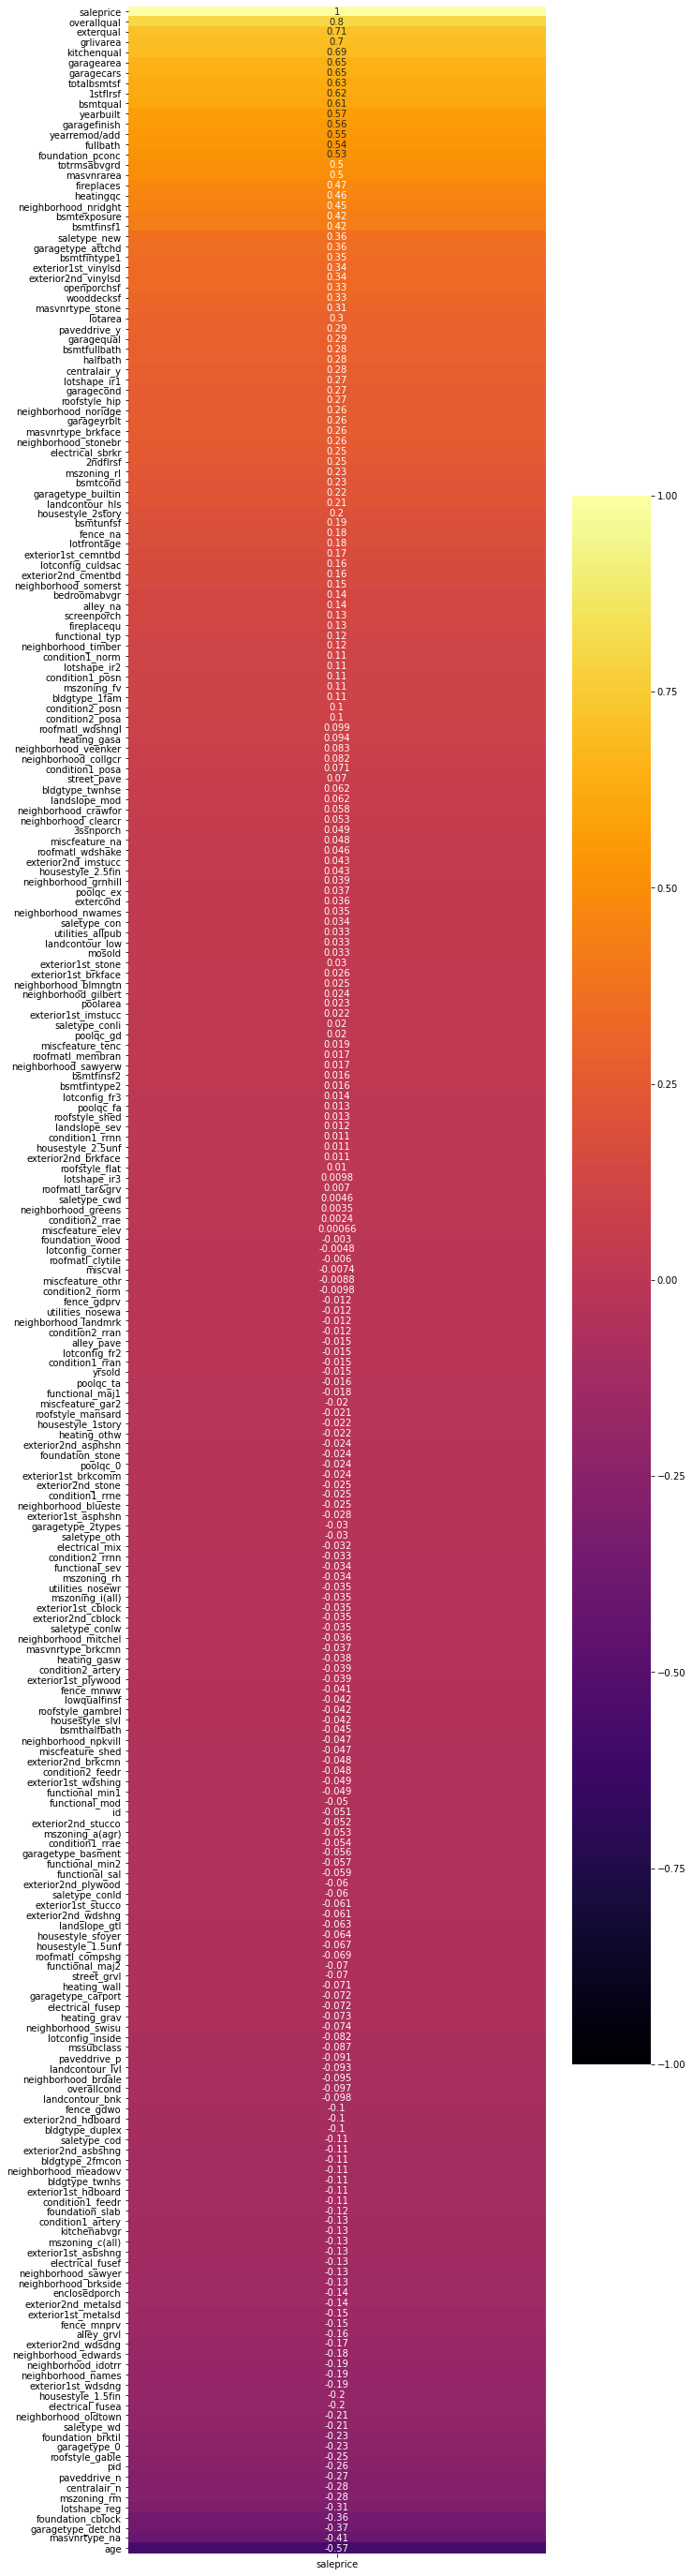

In [6]:
plt.figure(figsize=(10,50))
sns.heatmap(corr_matrix, annot = True, vmin =-1, vmax=1, cmap='inferno');

Creating data plots of the top and bottom 30 data that has the highest correlations of sales to get a better understanding of the data.

In [7]:
top_corr = corr_matrix.head(31).index.drop('saleprice')

In [8]:
bot_corr = corr_matrix.tail(31).index.drop('pid')

# Plotting Correlations

In [9]:
def subplot_scatter(dataframe, list_of_columns):
    nrows = int(np.ceil(len(list_of_columns)/3)) 
    fig, ax = plt.subplots(nrows=nrows, ncols=3,figsize=(15, nrows*3.5)) 
    ax = ax.ravel() 
    for i, column in enumerate(list_of_columns): 
        sns.regplot(y=dataframe.saleprice, x=dataframe[column],ax=ax[i])
        ax[i].set_title(f'{column} vs saleprice',fontsize=14)  
        ax[i].tick_params(labelsize=12)
        ax[i].set_xlabel(column, fontsize=14)
        ax[i].set_ylabel('saleprice', fontsize=14)
    plt.tight_layout()

In [10]:
# create Num_histogram function
def subplot_histograms(dataframe, list_of_columns):
    nrows = int(np.ceil(len(list_of_columns)/3)) 
    fig, ax = plt.subplots(nrows=nrows, ncols=3,figsize=(15, nrows*3.5)) 
    ax = ax.ravel() 
    for i, column in enumerate(list_of_columns): 
        ax[i].hist(dataframe[column],bins=10)
        ax[i].axvline(dataframe[column].median(), color='red', linestyle='dashed')
        ax[i].set_title(f'{column}',fontsize=14)
        ax[i].tick_params(labelsize=12)
        ax[i].set_xlabel(column, fontsize=14)
    plt.tight_layout()

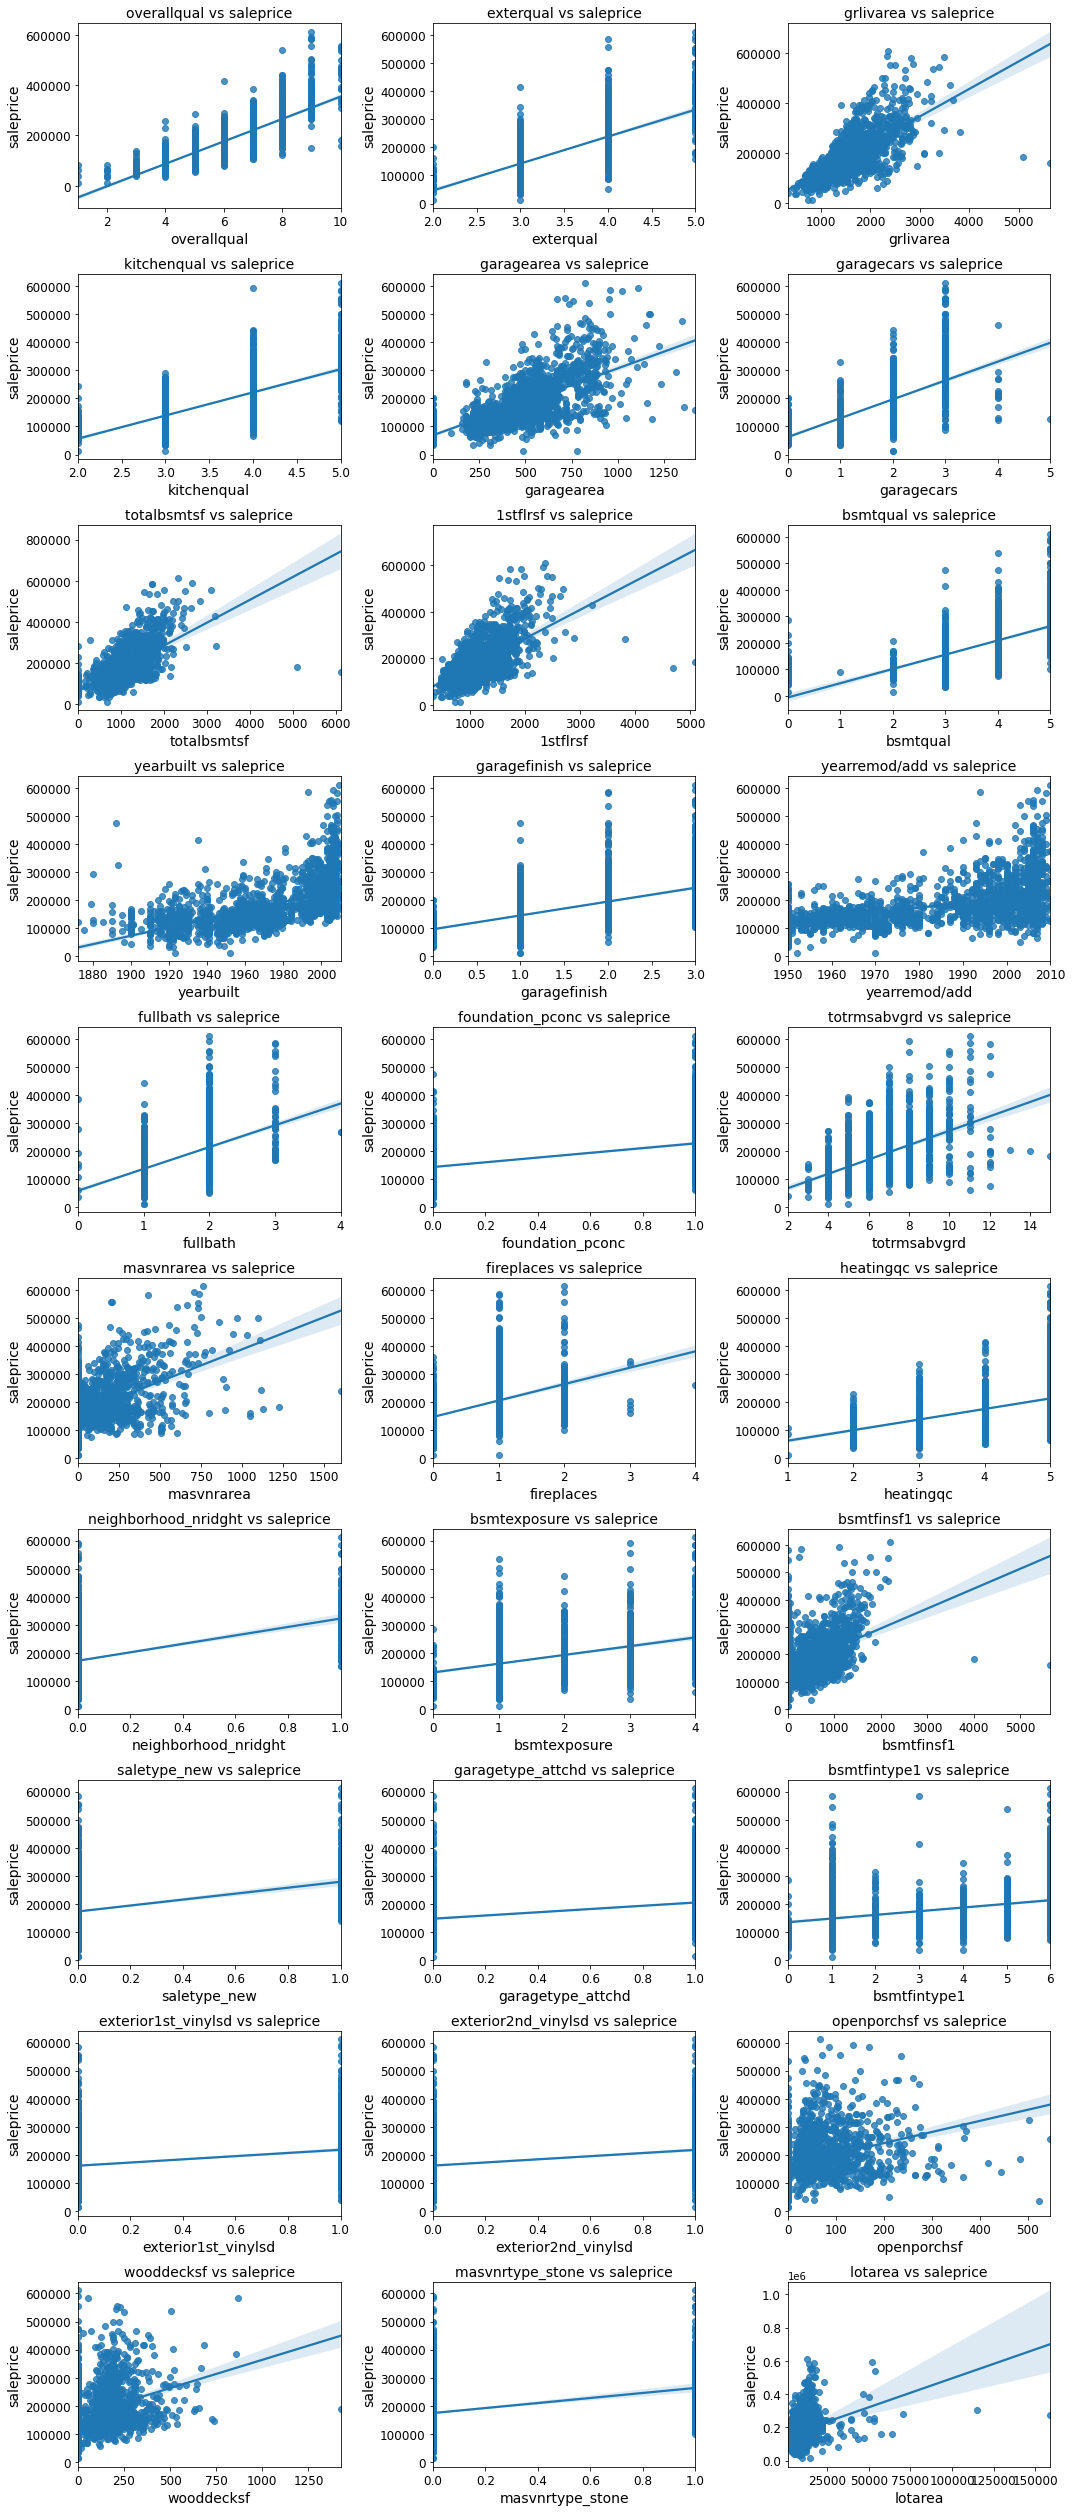

In [11]:
subplot_scatter(train, top_corr)

# Top 20 Correlations (Pearson)

On the highest of correlations was overall quality(0.8) of the house, followed by external quality(0.71), general living area(0.7), kitchen quality(0.69), garage area (0.65)/garage cars(0.65), totalbsmtsf(0.63). The immediate causations that become apparent are, the quality of the house, and the amount of living space are largely the biggest correlations toward high property prices. 

Additionally, some interesting features in the top 20 to note. 
- foundation_pconc refers to a foundation made of poured concrete. 
- totrmsabvgrd refers to a real estate term for total rooms above grade, it is used to describe rooms in a house that are above basement level.  
- neighborhood_nright refers to Northridge Heights(neigbhorhood) likely a more valuable piece of real estate. 
- fireplaces and 
- masvnrarea were some observations that may give homeseekers an edge in property value over other more common knowledge

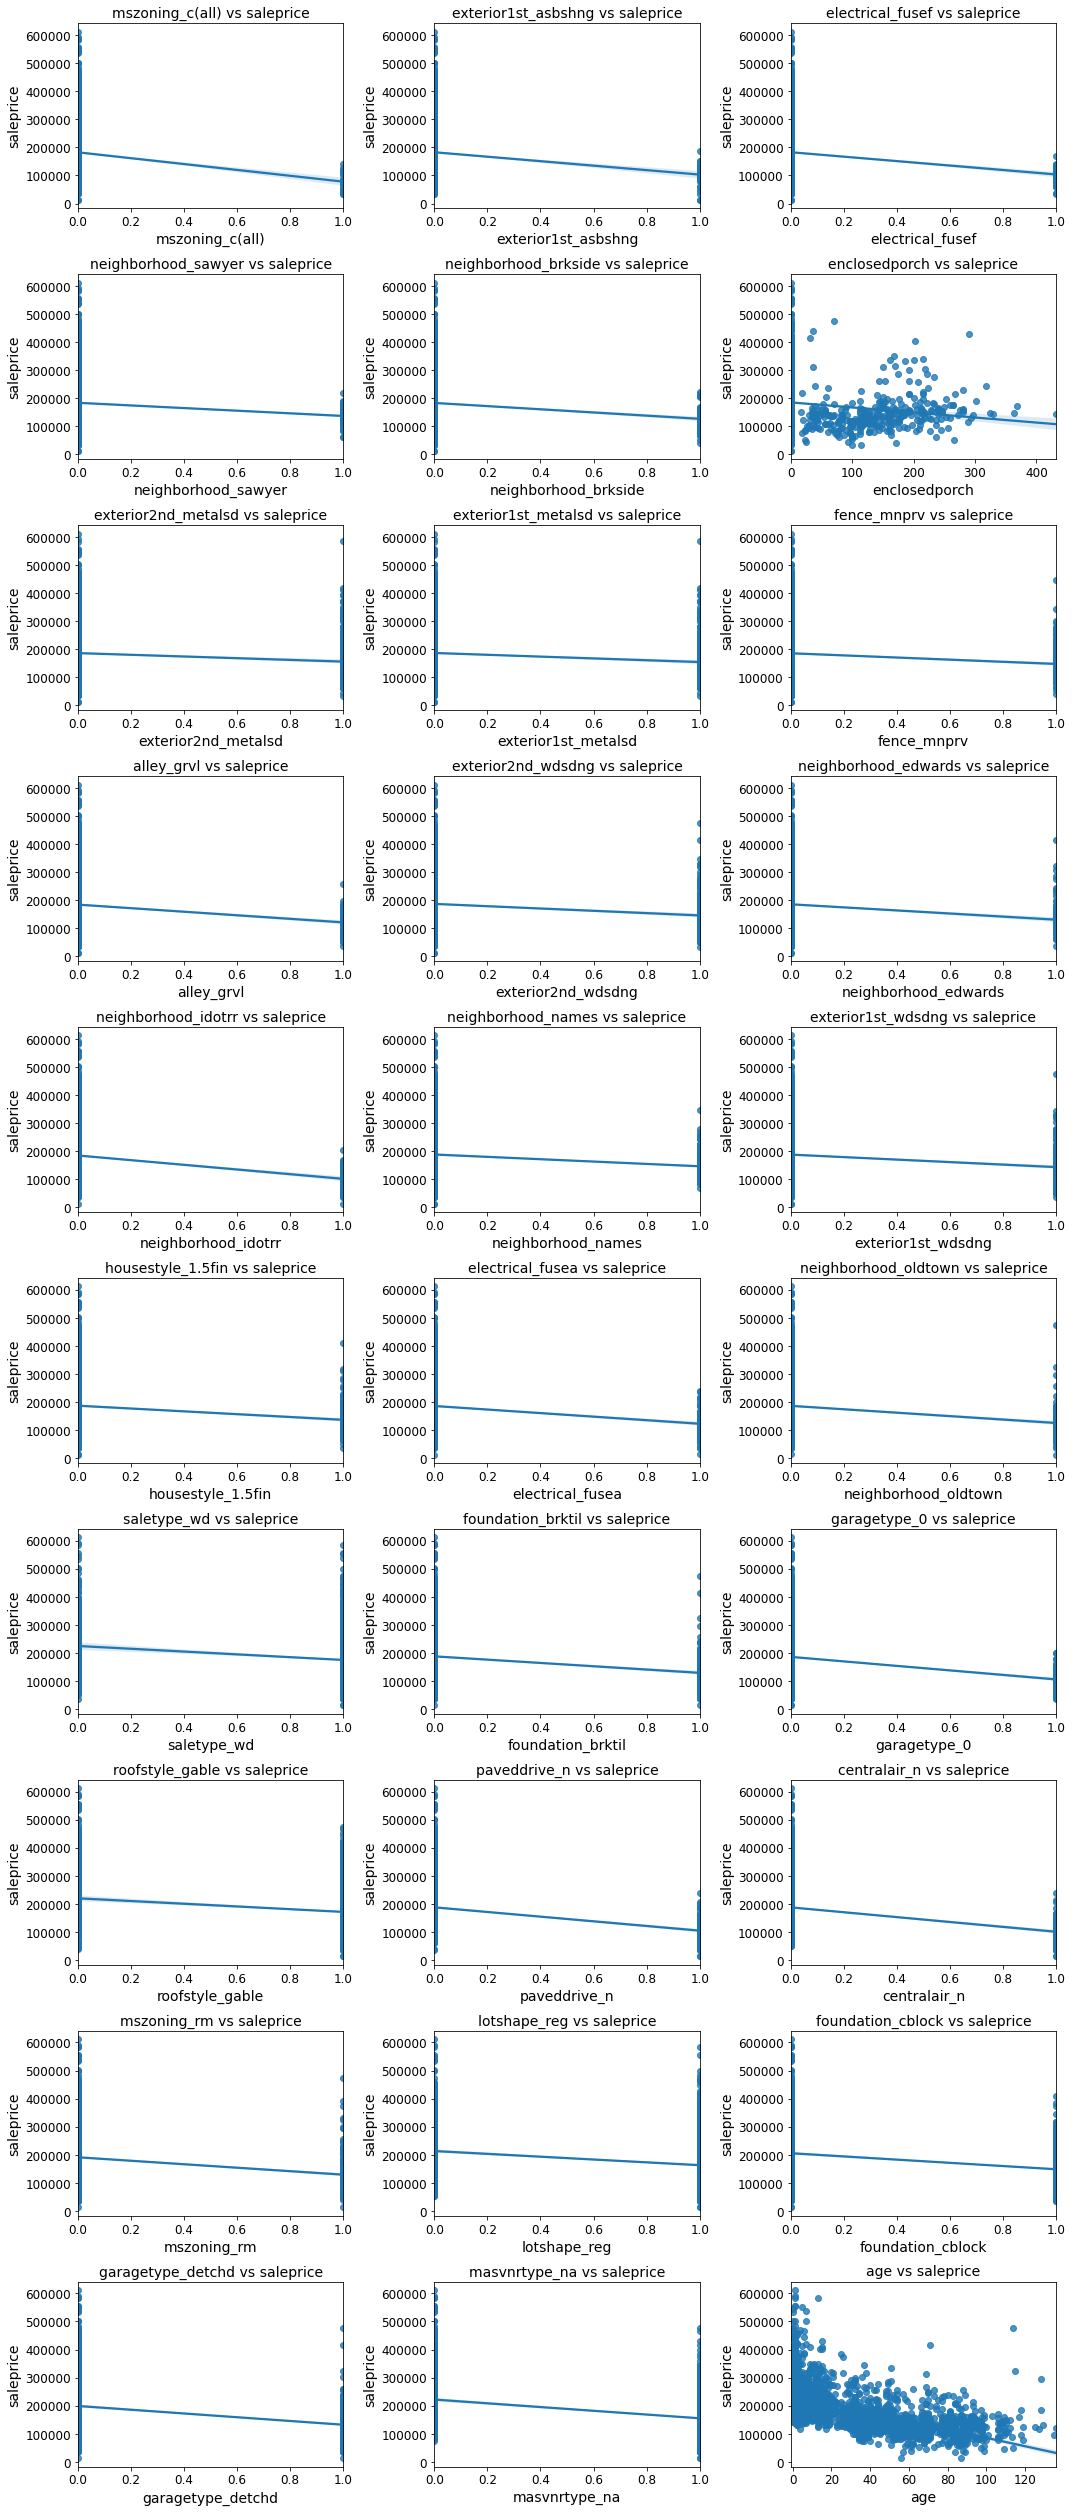

In [12]:
subplot_scatter(train, bot_corr)

On the most negative correlations to salesprice
- The variable age(-0.57) which was created earlier is showing the highest negative correlation to salesprice as expected.
- Following that, lack of masonry veneer(-0.41) is negative toward the prediction of the salesprice. 
- Detached garages(-0.37)
- Foundation cinderblock (-0.36)
- lotshape(-0.31) refers to the having a regular lot shape of property space. 

Most of the lowest 30 correlations are not comparatively strong negative correlations (range of -0.57 to -0.13) compared to the top 30 correlations (range of 0.80 to 0.42)

# Features of interest

Putting together the top 25 and the bottom 25 correlations to build an initial model before attempting to cull more features.

In [13]:
top_corr

Index(['overallqual', 'exterqual', 'grlivarea', 'kitchenqual', 'garagearea',
       'garagecars', 'totalbsmtsf', '1stflrsf', 'bsmtqual', 'yearbuilt',
       'garagefinish', 'yearremod/add', 'fullbath', 'foundation_pconc',
       'totrmsabvgrd', 'masvnrarea', 'fireplaces', 'heatingqc',
       'neighborhood_nridght', 'bsmtexposure', 'bsmtfinsf1', 'saletype_new',
       'garagetype_attchd', 'bsmtfintype1', 'exterior1st_vinylsd',
       'exterior2nd_vinylsd', 'openporchsf', 'wooddecksf', 'masvnrtype_stone',
       'lotarea'],
      dtype='object')

In [14]:
bot_corr

Index(['mszoning_c(all)', 'exterior1st_asbshng', 'electrical_fusef',
       'neighborhood_sawyer', 'neighborhood_brkside', 'enclosedporch',
       'exterior2nd_metalsd', 'exterior1st_metalsd', 'fence_mnprv',
       'alley_grvl', 'exterior2nd_wdsdng', 'neighborhood_edwards',
       'neighborhood_idotrr', 'neighborhood_names', 'exterior1st_wdsdng',
       'housestyle_1.5fin', 'electrical_fusea', 'neighborhood_oldtown',
       'saletype_wd', 'foundation_brktil', 'garagetype_0', 'roofstyle_gable',
       'paveddrive_n', 'centralair_n', 'mszoning_rm', 'lotshape_reg',
       'foundation_cblock', 'garagetype_detchd', 'masvnrtype_na', 'age'],
      dtype='object')

In [15]:
features = []
for i in top_corr:
    features.append(i)

In [16]:
for i in bot_corr:
    features.append(i)

In [17]:
print (len(features))
features

60


['overallqual',
 'exterqual',
 'grlivarea',
 'kitchenqual',
 'garagearea',
 'garagecars',
 'totalbsmtsf',
 '1stflrsf',
 'bsmtqual',
 'yearbuilt',
 'garagefinish',
 'yearremod/add',
 'fullbath',
 'foundation_pconc',
 'totrmsabvgrd',
 'masvnrarea',
 'fireplaces',
 'heatingqc',
 'neighborhood_nridght',
 'bsmtexposure',
 'bsmtfinsf1',
 'saletype_new',
 'garagetype_attchd',
 'bsmtfintype1',
 'exterior1st_vinylsd',
 'exterior2nd_vinylsd',
 'openporchsf',
 'wooddecksf',
 'masvnrtype_stone',
 'lotarea',
 'mszoning_c(all)',
 'exterior1st_asbshng',
 'electrical_fusef',
 'neighborhood_sawyer',
 'neighborhood_brkside',
 'enclosedporch',
 'exterior2nd_metalsd',
 'exterior1st_metalsd',
 'fence_mnprv',
 'alley_grvl',
 'exterior2nd_wdsdng',
 'neighborhood_edwards',
 'neighborhood_idotrr',
 'neighborhood_names',
 'exterior1st_wdsdng',
 'housestyle_1.5fin',
 'electrical_fusea',
 'neighborhood_oldtown',
 'saletype_wd',
 'foundation_brktil',
 'garagetype_0',
 'roofstyle_gable',
 'paveddrive_n',
 'centrala

# Data Preparation_1

In [18]:
X = train[features]
y = train['saleprice']

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=40)

In [20]:
ss = StandardScaler()
ss.fit(X_train) 
X_train_scaled = ss.transform(X_train)
X_test_scaled = ss.transform(X_test)

# Instantiating Models

In [21]:
lr = LinearRegression()

In [22]:
lasso = LassoCV(n_alphas=400)

In [23]:
ridge = RidgeCV(alphas=np.logspace(0, 5, 200))

# Initial Modeling

The intention of this portion is to put some preliminary models through with baseline data in order to pull coef values to later cull features. 

### Linear Regression_1

In [24]:
lr_scores = cross_val_score(lr, X_train_scaled, y_train, scoring = 'neg_root_mean_squared_error', cv=5)
print ('Linear Regression RMSE Train Score:', -lr_scores.mean())

Linear Regression RMSE Train Score: 31322.54175209963


In [25]:
lr.fit(X_train_scaled, y_train)

LinearRegression()

In [26]:
y_pred = lr.predict(X_test_scaled)

In [27]:
print('Linear Regression RMSE Test Score:', np.sqrt(mean_squared_error(y_test, y_pred)))

Linear Regression RMSE Test Score: 35045.59536424728


My data is slightly underfitting the model. 

- I'm using RMSE as I currently have 60 features, additionally, the Kaggle submission's leaderboard rankings for this project will be determined by RMSE
- Since I'm also looking to cull some of the features <40, I'm using R2 as the baseline model. 

# Lasso_1

In [28]:
lasso_scores = cross_val_score(lasso, X_train_scaled, y_train, scoring ='neg_root_mean_squared_error',cv=5)

In [29]:
print('Lasso Regression RMSE Train Score:', -lasso_scores.mean())

Lasso Regression RMSE Train Score: 31389.67941768748


In [30]:
lasso.fit(X_train_scaled, y_train)

LassoCV(n_alphas=400)

In [31]:
y_pred = lasso.predict(X_test_scaled)

In [32]:
print('Lasso RMSE Test Score:', np.sqrt(mean_squared_error(y_test, y_pred)))

Lasso RMSE Test Score: 35232.43407934022


# Ridge_1

In [33]:
ridge_scores = cross_val_score(ridge, X_train_scaled, y_train, scoring ='neg_root_mean_squared_error', cv=5)
print('Ridge Regression R2 Train Score:', -ridge_scores.mean())

Ridge Regression R2 Train Score: 31651.303922936873


In [34]:
ridge.fit(X_train_scaled, y_train);

In [35]:
y_pred = ridge.predict(X_test_scaled)

In [36]:
print('Ridge RMSE Test Score:', np.sqrt(mean_squared_error(y_test, y_pred)))

Ridge RMSE Test Score: 35154.13730580237


#### Initial Modeling Impressions
For all 3 initial models, the data is found to be underfitting the model. Lasso Regression seemed to have the best score, although not by much.

#### Culling Features after initial modeling

In [37]:
lasso_coef = pd.Series(lasso.coef_, index=features).sort_values(ascending=False).to_frame(name = 'lasso coef')
lasso_coef

,lasso coef
grlivarea,20271.817258
overallqual,16656.471299
exterqual,8829.700954
kitchenqual,6995.503016
neighborhood_nridght,6968.771232
masvnrarea,5775.618343
bsmtexposure,5545.826466
garagecars,5511.775822
bsmtfinsf1,4827.134842
1stflrsf,4057.173344


In [38]:
lasso_coef.loc[lasso_coef['lasso coef']==0]

,lasso coef
paveddrive_n,-0.0
foundation_brktil,-0.0
garagetype_attchd,0.0
fullbath,0.0
yearbuilt,0.0
centralair_n,-0.0
saletype_wd,0.0
garagetype_detchd,-0.0
totrmsabvgrd,0.0
age,-0.0


In [39]:
ridge_coef_series = pd.Series(ridge.coef_, index=features).sort_values(ascending=False)
ridge_coef_series

grlivarea               12236.409645
overallqual             11867.790798
exterqual                7627.696762
kitchenqual              7212.221565
masvnrarea               6320.081846
neighborhood_nridght     6084.011767
bsmtexposure             4974.645981
fireplaces               4717.422533
totrmsabvgrd             4669.983466
1stflrsf                 4390.660868
garagecars               4261.716304
bsmtfinsf1               4113.004160
garagearea               3652.790543
lotarea                  3548.889550
saletype_new             3238.909013
bsmtfintype1             3020.532491
bsmtqual                 2556.582594
masvnrtype_na            2375.008803
yearremod/add            2339.977031
totalbsmtsf              2296.210512
wooddecksf               2118.188334
openporchsf              2058.706768
exterior2nd_wdsdng       1904.738280
heatingqc                1859.350478
garagefinish             1711.873596
garagetype_0             1374.490238
masvnrtype_stone         1292.460081
f

Base 13 identified from lasso, additionally adding in 'foundation_brktil', 'neighborhood_oldtown'

In [40]:
lass_remove = lasso_coef.loc[lasso_coef['lasso coef']==0].index
lass_remove

Index(['paveddrive_n', 'foundation_brktil', 'garagetype_attchd', 'fullbath',
       'yearbuilt', 'centralair_n', 'saletype_wd', 'garagetype_detchd',
       'totrmsabvgrd', 'age', 'exterior1st_vinylsd', 'exterior1st_metalsd',
       'housestyle_1.5fin', 'neighborhood_names', 'neighborhood_idotrr',
       'exterior2nd_wdsdng', 'exterior2nd_vinylsd', 'fence_mnprv',
       'alley_grvl', 'exterior2nd_metalsd', 'enclosedporch',
       'neighborhood_sawyer', 'electrical_fusef', 'exterior1st_asbshng',
       'mszoning_c(all)'],
      dtype='object')

In [41]:
#Removing Features with 0 correlation after regularization
for i in lass_remove:
    features.remove(i)

In [42]:
len(features)

35

Now I'm at a more reasonable feature list length of 35, I will attempt to model a second time.

# New Features

#### Data Preparation_2

In [43]:
X = train[features]
y = train['saleprice']

In [44]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=30)

In [45]:
ss = StandardScaler()
ss.fit(X_train) 
X_train_scaled = ss.transform(X_train)
X_test_scaled = ss.transform(X_test)

### Linear Regression_2

In [46]:
lr_scores = cross_val_score(lr, X_train_scaled, y_train, scoring = 'neg_root_mean_squared_error', cv=5)
print ('Linear Regression RMSE Train Score:', -lr_scores.mean())

Linear Regression RMSE Train Score: 25436.08688276555


In [47]:
lr.fit(X_train_scaled, y_train)

LinearRegression()

In [48]:
y_pred = lr.predict(X_test_scaled)

In [49]:
print('Linear Regression RMSE Test Score:', np.sqrt(mean_squared_error(y_test, y_pred)))

Linear Regression RMSE Test Score: 49891.56678641604


## Ridge_2

In [50]:
ridge_scores = cross_val_score(ridge, X_train_scaled, y_train, scoring ='neg_root_mean_squared_error', cv=5)
print('Ridge Regression R2 Train Score:', -ridge_scores.mean())

Ridge Regression R2 Train Score: 25427.619010538205


In [51]:
ridge.fit(X_train_scaled, y_train);

In [52]:
y_pred = ridge.predict(X_test_scaled)

In [53]:
print('Ridge RMSE Test Score:', np.sqrt(mean_squared_error(y_test, y_pred)))

Ridge RMSE Test Score: 49388.205970619114


## Lasso_2

In [54]:
lasso_scores = cross_val_score(lasso, X_train_scaled, y_train, scoring ='neg_root_mean_squared_error',cv=5)

In [55]:
print('Lasso Regression RMSE Train Score:', -lasso_scores.mean())

Lasso Regression RMSE Train Score: 25428.222735311447


In [56]:
lasso.fit(X_train_scaled, y_train)

LassoCV(n_alphas=400)

In [57]:
y_pred = lasso.predict(X_test_scaled)

In [58]:
print('Lasso RMSE Test Score:', np.sqrt(mean_squared_error(y_test, y_pred)))

Lasso RMSE Test Score: 49629.34176495029


#### New Features thoughts

After removing features using LassoCV, my models across the board ended up overfitting the data to a large degree. It's more likely that having around 50 features might have brought me closer to my goal. 

# Feature Engineering Using LassoCV

Using Lasso Regression, there is another method in feature engineering that is commonly used to sift irrelevant features. Because we lack domain knowledge of housing data, it's possible using the machine to comb through all possible features can give us better insights/results on the data. I am using the original train data to see if I missed out on any key features.
- Additionally, narrowing down features to a smaller degree with the intention of using polynomial featurization after this which will multiply the features. 

In [59]:
#Creating a second feature list called features2 to avoid confusion with the earlier manually generated features
features2 = train.columns[train.columns !='saleprice']
X = train[features2] 
y = train['saleprice']

In [60]:
#Doing a fit for the features2
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=30)

In [61]:
ss = StandardScaler()
ss.fit(X_train) 
X_train_scaled = ss.transform(X_train)
X_test_scaled = ss.transform(X_test)

In [62]:
X.shape

(2051, 248)

Using LassoCV with a high penalty alpha to give exactly 20 features to work with. 

In [63]:
lasso = LassoCV(alphas = [4500])

In [64]:
lasso.fit(X_train_scaled, y_train)

LassoCV(alphas=[4500])

In [65]:
lasso_coef = pd.Series(lasso.coef_, index =features2).sort_values(ascending = False).to_frame(name = 'lasso_coef')
lasso_coef

,lasso_coef
grlivarea,21799.308362
overallqual,18627.486469
exterqual,9132.487389
bsmtfinsf1,7950.241328
totalbsmtsf,6018.720430
kitchenqual,5821.587255
garagearea,4705.420069
lotarea,4687.269119
masvnrarea,4613.084521
neighborhood_nridght,3842.702376


In [66]:
lasso_coef.loc[lasso_coef['lasso_coef']!=0].shape

(20, 1)

In [67]:
features2 = lasso_coef.loc[lasso_coef['lasso_coef']!=0]
features2 = features2.index
features2

Index(['grlivarea', 'overallqual', 'exterqual', 'bsmtfinsf1', 'totalbsmtsf',
       'kitchenqual', 'garagearea', 'lotarea', 'masvnrarea',
       'neighborhood_nridght', '1stflrsf', 'bsmtexposure', 'saletype_new',
       'fireplaces', 'yearremod/add', 'bldgtype_1fam', 'neighborhood_stonebr',
       'landcontour_hls', 'screenporch', 'age'],
      dtype='object')

# Polynomial Featuring

In [68]:
X = train[features2]
X.shape

(2051, 20)

In [69]:
poly = PolynomialFeatures(include_bias=False)

In [70]:
X_poly = poly.fit_transform(X)

In [71]:
poly_scale = StandardScaler()

In [72]:
train_poly = pd.DataFrame(X_poly, columns=poly.get_feature_names(features2))
train_poly

,grlivarea,overallqual,exterqual,bsmtfinsf1,totalbsmtsf,kitchenqual,garagearea,lotarea,masvnrarea,neighborhood_nridght,1stflrsf,bsmtexposure,saletype_new,fireplaces,yearremod/add,bldgtype_1fam,neighborhood_stonebr,landcontour_hls,screenporch,age,grlivarea^2,grlivarea overallqual,grlivarea exterqual,grlivarea bsmtfinsf1,grlivarea totalbsmtsf,grlivarea kitchenqual,grlivarea garagearea,grlivarea lotarea,grlivarea masvnrarea,grlivarea neighborhood_nridght,grlivarea 1stflrsf,grlivarea bsmtexposure,grlivarea saletype_new,grlivarea fireplaces,grlivarea yearremod/add,grlivarea bldgtype_1fam,grlivarea neighborhood_stonebr,grlivarea landcontour_hls,grlivarea screenporch,grlivarea age,overallqual^2,overallqual exterqual,overallqual bsmtfinsf1,overallqual totalbsmtsf,overallqual kitchenqual,overallqual garagearea,overallqual lotarea,overallqual masvnrarea,overallqual neighborhood_nridght,overallqual 1stflrsf,overallqual bsmtexposure,overallqual saletype_new,overallqual fireplaces,overallqual yearremod/add,overallqual bldgtype_1fam,overallqual neighborhood_stonebr,overallqual landcontour_hls,overallqual screenporch,overallqual age,exterqual^2,exterqual bsmtfinsf1,exterqual totalbsmtsf,exterqual kitchenqual,exterqual garagearea,exterqual lotarea,exterqual masvnrarea,exterqual neighborhood_nridght,exterqual 1stflrsf,exterqual bsmtexposure,exterqual saletype_new,exterqual fireplaces,exterqual yearremod/add,exterqual bldgtype_1fam,exterqual neighborhood_stonebr,exterqual landcontour_hls,exterqual screenporch,exterqual age,bsmtfinsf1^2,bsmtfinsf1 totalbsmtsf,bsmtfinsf1 kitchenqual,bsmtfinsf1 garagearea,bsmtfinsf1 lotarea,bsmtfinsf1 masvnrarea,bsmtfinsf1 neighborhood_nridght,bsmtfinsf1 1stflrsf,bsmtfinsf1 bsmtexposure,bsmtfinsf1 saletype_new,bsmtfinsf1 fireplaces,bsmtfinsf1 yearremod/add,bsmtfinsf1 bldgtype_1fam,bsmtfinsf1 neighborhood_stonebr,bsmtfinsf1 landcontour_hls,bsmtfinsf1 screenporch,bsmtfinsf1 age,totalbsmtsf^2,totalbsmtsf kitchenqual,totalbsmtsf garagearea,totalbsmtsf lotarea,totalbsmtsf masvnrarea,totalbsmtsf neighborhood_nridght,totalbsmtsf 1stflrsf,totalbsmtsf bsmtexposure,totalbsmtsf saletype_new,totalbsmtsf fireplaces,totalbsmtsf yearremod/add,totalbsmtsf bldgtype_1fam,totalbsmtsf neighborhood_stonebr,totalbsmtsf landcontour_hls,totalbsmtsf screenporch,totalbsmtsf age,kitchenqual^2,kitchenqual garagearea,kitchenqual lotarea,kitchenqual masvnrarea,kitchenqual neighborhood_nridght,kitchenqual 1stflrsf,kitchenqual bsmtexposure,kitchenqual saletype_new,kitchenqual fireplaces,kitchenqual yearremod/add,kitchenqual bldgtype_1fam,kitchenqual neighborhood_stonebr,kitchenqual landcontour_hls,kitchenqual screenporch,kitchenqual age,garagearea^2,garagearea lotarea,garagearea masvnrarea,garagearea neighborhood_nridght,garagearea 1stflrsf,garagearea bsmtexposure,garagearea saletype_new,garagearea fireplaces,garagearea yearremod/add,garagearea bldgtype_1fam,garagearea neighborhood_stonebr,garagearea landcontour_hls,garagearea screenporch,garagearea age,lotarea^2,lotarea masvnrarea,lotarea neighborhood_nridght,lotarea 1stflrsf,lotarea bsmtexposure,lotarea saletype_new,lotarea fireplaces,lotarea yearremod/add,lotarea bldgtype_1fam,lotarea neighborhood_stonebr,lotarea landcontour_hls,lotarea screenporch,lotarea age,masvnrarea^2,masvnrarea neighborhood_nridght,masvnrarea 1stflrsf,masvnrarea bsmtexposure,masvnrarea saletype_new,masvnrarea fireplaces,masvnrarea yearremod/add,masvnrarea bldgtype_1fam,masvnrarea neighborhood_stonebr,masvnrarea landcontour_hls,masvnrarea screenporch,masvnrarea age,neighborhood_nridght^2,neighborhood_nridght 1stflrsf,neighborhood_nridght bsmtexposure,neighborhood_nridght saletype_new,neighborhood_nridght fireplaces,neighborhood_nridght yearremod/add,neighborhood_nridght bldgtype_1fam,neighborhood_nridght neighborhood_stonebr,neighborhood_nridght landcontour_hls,neighborhood_nridght screenporch,neighborhood_nridght age,1stflrsf^2,1stflrsf bsmtexposure,1stflrsf saletype_new,1stflrsf fireplaces,1stflrsf yearremod/add,1stflr

In [73]:
train_poly_scaled = pd.DataFrame(poly_scale.fit_transform(X_poly), columns=poly.get_feature_names(features2))
train_poly_scaled

,grlivarea,overallqual,exterqual,bsmtfinsf1,totalbsmtsf,kitchenqual,garagearea,lotarea,masvnrarea,neighborhood_nridght,1stflrsf,bsmtexposure,saletype_new,fireplaces,yearremod/add,bldgtype_1fam,neighborhood_stonebr,landcontour_hls,screenporch,age,grlivarea^2,grlivarea overallqual,grlivarea exterqual,grlivarea bsmtfinsf1,grlivarea totalbsmtsf,grlivarea kitchenqual,grlivarea garagearea,grlivarea lotarea,grlivarea masvnrarea,grlivarea neighborhood_nridght,grlivarea 1stflrsf,grlivarea bsmtexposure,grlivarea saletype_new,grlivarea fireplaces,grlivarea yearremod/add,grlivarea bldgtype_1fam,grlivarea neighborhood_stonebr,grlivarea landcontour_hls,grlivarea screenporch,grlivarea age,overallqual^2,overallqual exterqual,overallqual bsmtfinsf1,overallqual totalbsmtsf,overallqual kitchenqual,overallqual garagearea,overallqual lotarea,overallqual masvnrarea,overallqual neighborhood_nridght,overallqual 1stflrsf,overallqual bsmtexposure,overallqual saletype_new,overallqual fireplaces,overallqual yearremod/add,overallqual bldgtype_1fam,overallqual neighborhood_stonebr,overallqual landcontour_hls,overallqual screenporch,overallqual age,exterqual^2,exterqual bsmtfinsf1,exterqual totalbsmtsf,exterqual kitchenqual,exterqual garagearea,exterqual lotarea,exterqual masvnrarea,exterqual neighborhood_nridght,exterqual 1stflrsf,exterqual bsmtexposure,exterqual saletype_new,exterqual fireplaces,exterqual yearremod/add,exterqual bldgtype_1fam,exterqual neighborhood_stonebr,exterqual landcontour_hls,exterqual screenporch,exterqual age,bsmtfinsf1^2,bsmtfinsf1 totalbsmtsf,bsmtfinsf1 kitchenqual,bsmtfinsf1 garagearea,bsmtfinsf1 lotarea,bsmtfinsf1 masvnrarea,bsmtfinsf1 neighborhood_nridght,bsmtfinsf1 1stflrsf,bsmtfinsf1 bsmtexposure,bsmtfinsf1 saletype_new,bsmtfinsf1 fireplaces,bsmtfinsf1 yearremod/add,bsmtfinsf1 bldgtype_1fam,bsmtfinsf1 neighborhood_stonebr,bsmtfinsf1 landcontour_hls,bsmtfinsf1 screenporch,bsmtfinsf1 age,totalbsmtsf^2,totalbsmtsf kitchenqual,totalbsmtsf garagearea,totalbsmtsf lotarea,totalbsmtsf masvnrarea,totalbsmtsf neighborhood_nridght,totalbsmtsf 1stflrsf,totalbsmtsf bsmtexposure,totalbsmtsf saletype_new,totalbsmtsf fireplaces,totalbsmtsf yearremod/add,totalbsmtsf bldgtype_1fam,totalbsmtsf neighborhood_stonebr,totalbsmtsf landcontour_hls,totalbsmtsf screenporch,totalbsmtsf age,kitchenqual^2,kitchenqual garagearea,kitchenqual lotarea,kitchenqual masvnrarea,kitchenqual neighborhood_nridght,kitchenqual 1stflrsf,kitchenqual bsmtexposure,kitchenqual saletype_new,kitchenqual fireplaces,kitchenqual yearremod/add,kitchenqual bldgtype_1fam,kitchenqual neighborhood_stonebr,kitchenqual landcontour_hls,kitchenqual screenporch,kitchenqual age,garagearea^2,garagearea lotarea,garagearea masvnrarea,garagearea neighborhood_nridght,garagearea 1stflrsf,garagearea bsmtexposure,garagearea saletype_new,garagearea fireplaces,garagearea yearremod/add,garagearea bldgtype_1fam,garagearea neighborhood_stonebr,garagearea landcontour_hls,garagearea screenporch,garagearea age,lotarea^2,lotarea masvnrarea,lotarea neighborhood_nridght,lotarea 1stflrsf,lotarea bsmtexposure,lotarea saletype_new,lotarea fireplaces,lotarea yearremod/add,lotarea bldgtype_1fam,lotarea neighborhood_stonebr,lotarea landcontour_hls,lotarea screenporch,lotarea age,masvnrarea^2,masvnrarea neighborhood_nridght,masvnrarea 1stflrsf,masvnrarea bsmtexposure,masvnrarea saletype_new,masvnrarea fireplaces,masvnrarea yearremod/add,masvnrarea bldgtype_1fam,masvnrarea neighborhood_stonebr,masvnrarea landcontour_hls,masvnrarea screenporch,masvnrarea age,neighborhood_nridght^2,neighborhood_nridght 1stflrsf,neighborhood_nridght bsmtexposure,neighborhood_nridght saletype_new,neighborhood_nridght fireplaces,neighborhood_nridght yearremod/add,neighborhood_nridght bldgtype_1fam,neighborhood_nridght neighborhood_stonebr,neighborhood_nridght landcontour_hls,neighborhood_nridght screenporch,neighborhood_nridght age,1stflrsf^2,1stflrsf bsmtexposure,1stflrsf saletype_new,1stflrsf fireplaces,1stflrsf yearremod/add,1stflr

In [74]:
X_train, X_test, y_train, y_test = train_test_split(train_poly_scaled, y, random_state=42)

In [75]:
alpha2 = np.logspace(2, 5, 10)

In [76]:
cross_lasso = LassoCV(alphas=alpha2, cv=5, max_iter=100000)

In [77]:
cross_lasso.fit(X_train, y_train)

LassoCV(alphas=array([   100.        ,    215.443469  ,    464.15888336,   1000.        ,
         2154.43469003,   4641.58883361,  10000.        ,  21544.34690032,
        46415.88833613, 100000.        ]),
        cv=5, max_iter=100000)

In [78]:
cross_lasso.score(X_train, y_train)

0.9290635296115644

In [79]:
cross_lasso.score(X_test, y_test)

0.9247664997676921

In [80]:
test_poly = poly.transform(test[features2])

In [81]:
test_poly_scaled = pd.DataFrame(poly_scale.transform(test_poly), columns=poly.get_feature_names(features2))
test_poly_scaled

,grlivarea,overallqual,exterqual,bsmtfinsf1,totalbsmtsf,kitchenqual,garagearea,lotarea,masvnrarea,neighborhood_nridght,1stflrsf,bsmtexposure,saletype_new,fireplaces,yearremod/add,bldgtype_1fam,neighborhood_stonebr,landcontour_hls,screenporch,age,grlivarea^2,grlivarea overallqual,grlivarea exterqual,grlivarea bsmtfinsf1,grlivarea totalbsmtsf,grlivarea kitchenqual,grlivarea garagearea,grlivarea lotarea,grlivarea masvnrarea,grlivarea neighborhood_nridght,grlivarea 1stflrsf,grlivarea bsmtexposure,grlivarea saletype_new,grlivarea fireplaces,grlivarea yearremod/add,grlivarea bldgtype_1fam,grlivarea neighborhood_stonebr,grlivarea landcontour_hls,grlivarea screenporch,grlivarea age,overallqual^2,overallqual exterqual,overallqual bsmtfinsf1,overallqual totalbsmtsf,overallqual kitchenqual,overallqual garagearea,overallqual lotarea,overallqual masvnrarea,overallqual neighborhood_nridght,overallqual 1stflrsf,overallqual bsmtexposure,overallqual saletype_new,overallqual fireplaces,overallqual yearremod/add,overallqual bldgtype_1fam,overallqual neighborhood_stonebr,overallqual landcontour_hls,overallqual screenporch,overallqual age,exterqual^2,exterqual bsmtfinsf1,exterqual totalbsmtsf,exterqual kitchenqual,exterqual garagearea,exterqual lotarea,exterqual masvnrarea,exterqual neighborhood_nridght,exterqual 1stflrsf,exterqual bsmtexposure,exterqual saletype_new,exterqual fireplaces,exterqual yearremod/add,exterqual bldgtype_1fam,exterqual neighborhood_stonebr,exterqual landcontour_hls,exterqual screenporch,exterqual age,bsmtfinsf1^2,bsmtfinsf1 totalbsmtsf,bsmtfinsf1 kitchenqual,bsmtfinsf1 garagearea,bsmtfinsf1 lotarea,bsmtfinsf1 masvnrarea,bsmtfinsf1 neighborhood_nridght,bsmtfinsf1 1stflrsf,bsmtfinsf1 bsmtexposure,bsmtfinsf1 saletype_new,bsmtfinsf1 fireplaces,bsmtfinsf1 yearremod/add,bsmtfinsf1 bldgtype_1fam,bsmtfinsf1 neighborhood_stonebr,bsmtfinsf1 landcontour_hls,bsmtfinsf1 screenporch,bsmtfinsf1 age,totalbsmtsf^2,totalbsmtsf kitchenqual,totalbsmtsf garagearea,totalbsmtsf lotarea,totalbsmtsf masvnrarea,totalbsmtsf neighborhood_nridght,totalbsmtsf 1stflrsf,totalbsmtsf bsmtexposure,totalbsmtsf saletype_new,totalbsmtsf fireplaces,totalbsmtsf yearremod/add,totalbsmtsf bldgtype_1fam,totalbsmtsf neighborhood_stonebr,totalbsmtsf landcontour_hls,totalbsmtsf screenporch,totalbsmtsf age,kitchenqual^2,kitchenqual garagearea,kitchenqual lotarea,kitchenqual masvnrarea,kitchenqual neighborhood_nridght,kitchenqual 1stflrsf,kitchenqual bsmtexposure,kitchenqual saletype_new,kitchenqual fireplaces,kitchenqual yearremod/add,kitchenqual bldgtype_1fam,kitchenqual neighborhood_stonebr,kitchenqual landcontour_hls,kitchenqual screenporch,kitchenqual age,garagearea^2,garagearea lotarea,garagearea masvnrarea,garagearea neighborhood_nridght,garagearea 1stflrsf,garagearea bsmtexposure,garagearea saletype_new,garagearea fireplaces,garagearea yearremod/add,garagearea bldgtype_1fam,garagearea neighborhood_stonebr,garagearea landcontour_hls,garagearea screenporch,garagearea age,lotarea^2,lotarea masvnrarea,lotarea neighborhood_nridght,lotarea 1stflrsf,lotarea bsmtexposure,lotarea saletype_new,lotarea fireplaces,lotarea yearremod/add,lotarea bldgtype_1fam,lotarea neighborhood_stonebr,lotarea landcontour_hls,lotarea screenporch,lotarea age,masvnrarea^2,masvnrarea neighborhood_nridght,masvnrarea 1stflrsf,masvnrarea bsmtexposure,masvnrarea saletype_new,masvnrarea fireplaces,masvnrarea yearremod/add,masvnrarea bldgtype_1fam,masvnrarea neighborhood_stonebr,masvnrarea landcontour_hls,masvnrarea screenporch,masvnrarea age,neighborhood_nridght^2,neighborhood_nridght 1stflrsf,neighborhood_nridght bsmtexposure,neighborhood_nridght saletype_new,neighborhood_nridght fireplaces,neighborhood_nridght yearremod/add,neighborhood_nridght bldgtype_1fam,neighborhood_nridght neighborhood_stonebr,neighborhood_nridght landcontour_hls,neighborhood_nridght screenporch,neighborhood_nridght age,1stflrsf^2,1stflrsf bsmtexposure,1stflrsf saletype_new,1stflrsf fireplaces,1stflrsf yearremod/add,1stflr

In [82]:
poly_pred = cross_lasso.predict(test_poly_scaled)
poly_pred

array([126844.10430559, 159221.24240077, 221009.06073646, 117869.29715311,
       179132.74625873,  91402.0707425 , 113508.24137523, 146492.57733362,
       173705.76664508, 174518.48895319, 157007.13699919, 119341.86002531,
       150014.12801358, 256784.45434045, 162339.77732751, 123906.96247325,
       154574.04823651, 117833.76660997, 198600.76868436, 206703.50980467,
       140251.50236103, 123801.06668833, 191229.74556252, 185681.17373643,
       180124.57044465, 116171.87885875, 136485.0256128 , 135694.08266553,
       152145.25043005,  58973.9828507 , 110659.99043984,  97595.38697389,
       236407.06371334, 166804.272688  , 226503.83096215, 177164.75329647,
       119014.38925632,  82318.45301874, 105848.25650756, 186089.04663488,
       148060.44572128, 212649.10239738, 154071.89299882, 173866.38321138,
       228908.23333175, 108764.29309117, 229310.23697939, 120051.21591602,
       122201.80488783, 126588.89764532, 113191.02973909, 194134.4651073 ,
       247183.37470164, 1

In [83]:
poly_predicted = pd.Series(poly_pred).to_frame(name ='SalePrice')
poly_predicted

,SalePrice
0,126844.104306
1,159221.242401
2,221009.060736
3,117869.297153
4,179132.746259
...,...
874,186588.043094
875,215254.930905
876,131966.803799
877,115898.794199


In [84]:
test_ids = pd.DataFrame(test.iloc[:,0])
#Formatting for Kaggel Submission
newdf = pd.concat([test_ids, poly_predicted], axis = 1)
newdf.rename(columns= {'id': 'Id'}, inplace=True)
newdf.head()

,Id,SalePrice
0,2658,126844.104306
1,2718,159221.242401
2,2414,221009.060736
3,1989,117869.297153
4,625,179132.746259


In [85]:
newdf.to_csv('datasets/pred2.csv', index=False)

# Significant Features for Homeseekers

In [89]:
cross_lasso_coef[cross_lasso_coef['cross_lasso_coef'] != 0].shape

(81, 1)

In [91]:
cross_lasso_coef.head(10)

,cross_lasso_coef
grlivarea overallqual,19343.329963
overallqual totalbsmtsf,12459.758646
grlivarea kitchenqual,12197.050006
overallqual bsmtfinsf1,10085.346390
kitchenqual 1stflrsf,9878.108774
exterqual bsmtfinsf1,9504.785176
overallqual lotarea,9052.901852
lotarea yearremod/add,7978.447933
grlivarea neighborhood_nridght,7013.888734
bsmtfinsf1 yearremod/add,6355.370634



- The biggest correlation for a house to sale price is unsurprisingly, the overall quality of the house, tied to the general living area. Additionally, the 2nd highest coef also alludes to the same thing. If a house is big and nice, it's gonna be costly. 
- Secondly, in most of the other relations, bsmtqual(The height of the basement) & lotarea for example, spaciousness drives prices. 
- It may be more prudent for homeowners to refrain from modifying the height of their basement since it could adversely affect the price of their home. 

In [94]:
cross_lasso_coef.tail(5)

,cross_lasso_coef
lotarea masvnrarea,-5695.410264
bsmtfinsf1^2,-7947.908002
totalbsmtsf 1stflrsf,-9964.319524
grlivarea bsmtfinsf1,-11274.442037
lotarea 1stflrsf,-13442.691343


Additionally, the biggest negative feature relation predictors toward saleprice were having 
- A large lotarea & 1st floor square footage, likely because it eats into living space
- General Living area & basement squarefoot, again for the same point.
- In general most of the items on the top 5 negative correlations are related to having living space be taken up by more undesirable living spaces, such as a basement. 

# Conclusion & Recommendations

For many homeseekers, purchasing a home is a long-term decision with financial repercussions. With the insight gained from this project, homeseekers should be able to create informed decisions on their home of choice with the list of features isolated. 

#### Recommendations
For the problem of recommending key variables to homeowners, rather than the focus being the strongest variables predicting sale price, more focus could be put on the lesser known items. Most people are aware of living space driving up property prices, however things such as having more fireplaces as seen during the EDA portion can also bring about additional property prices. 